# Shot Type for Ads

## Exploratory Data Analysis


In [104]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import json

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [8]:
# reading the JSON data using json.load()
file = '/workspaces/final-project-shot-type/data/shot-type-dataset/v1_split_trailer.json'
with open(file) as train_file:
    dict= json.load(train_file)


In [9]:
dataset = []
movie = []
shot= []
scale_label = []
scale_val = []
mov_label = []
mov_val = []

for key_type_ds in dict:
    for key_movie in dict[key_type_ds]:
        for key_shot in dict[key_type_ds][key_movie]:

            dataset.append(key_type_ds)
            movie.append(key_movie)
            shot.append(key_shot)
            scale_label.append(dict[key_type_ds][key_movie][key_shot]['scale']['label'])
            scale_val.append(dict[key_type_ds][key_movie][key_shot]['scale']['value'])
            mov_label.append(dict[key_type_ds][key_movie][key_shot]['movement']['label'])
            mov_val.append(dict[key_type_ds][key_movie][key_shot]['movement']['value'])
            
data = list(zip(dataset, movie, shot, scale_label, scale_val, mov_label, mov_val))  
columns = ['dataset','movie', 'shot', 'scale_label', 'scale_val', 'move_label', 'move_val']  
        
df = pd.DataFrame(data, columns=columns)

In [10]:
df

,dataset,movie,shot,scale_label,scale_val,move_label,move_val
0,train,tt0444850,0014,CS,1,Static,4
1,train,tt0444850,0015,CS,1,Static,4
2,train,tt0444850,0016,ECS,0,Static,4
3,train,tt2005173,0002,MS,2,Static,4
4,train,tt2005173,0014,CS,1,Static,4
...,...,...,...,...,...,...,...
33648,test,tt6644200,0011,FS,3,Static,4
33649,test,tt6644200,0015,MS,2,Motion,0
33650,test,tt6644200,0021,FS,3,Motion,0
33651,test,tt6644200,0026,LS,4,Static,4


#### Number of movies

In [11]:
movies_num = df['movie'].unique().shape[0]
movies_num

7848

#### Number of shots

In [12]:
shots_num = df['shot'].shape[0]
shots_num

33653

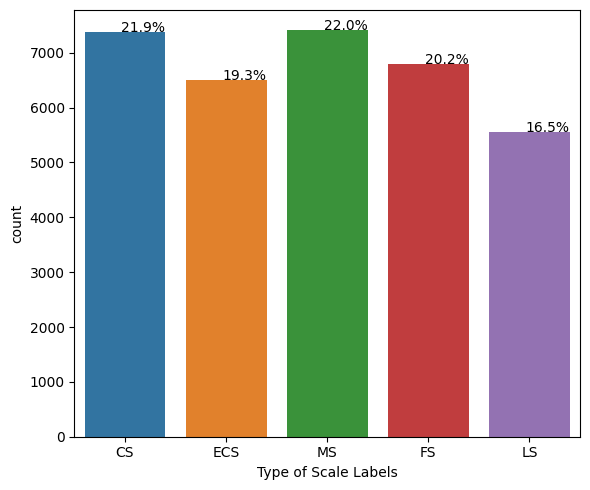

In [96]:
# Plotting the Education level with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['scale_label'].values)
ax.set(xlabel='Type of Scale Labels')

#calculating percentage of each label
total = float(len(df['scale_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

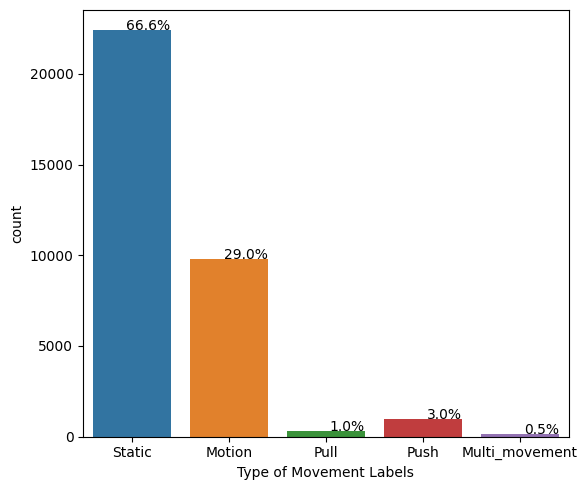

In [97]:
# Plotting the Education level with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['move_label'].values)
ax.set(xlabel='Type of Movement Labels')

#calculating percentage of each label
total = float(len(df['move_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

#### Number of FPS, Total Frames and trailer duration 

In [17]:
import cv2

In [86]:
fps_list = []
frames_list = []
duration_list = []


for idx in df.index.values:
    movie = df['movie'].iloc[idx]
    shot = df['shot'].iloc[idx]
    video = cv2.VideoCapture('/workspaces/final-project-shot-type/data/shot-type-dataset/trailer/'+ movie +'/shot_' + shot + '.mp4')
    total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = round (video.get(cv2.CAP_PROP_FPS),0)
    frames_list.append(total_frames)
    fps_list.append(fps)
    duration_list.append(round (total_frames / fps,1))
    print(f'movie {idx} / {len(df.index.values)} done')


movie 0 / 33653 done
movie 1 / 33653 done
movie 2 / 33653 done
movie 3 / 33653 done
movie 4 / 33653 done
movie 5 / 33653 done
movie 6 / 33653 done
movie 7 / 33653 done
movie 8 / 33653 done
movie 9 / 33653 done
movie 10 / 33653 done
movie 11 / 33653 done
movie 12 / 33653 done
movie 13 / 33653 done
movie 14 / 33653 done
movie 15 / 33653 done
movie 16 / 33653 done
movie 17 / 33653 done
movie 18 / 33653 done
movie 19 / 33653 done
movie 20 / 33653 done
movie 21 / 33653 done
movie 22 / 33653 done
movie 23 / 33653 done
movie 24 / 33653 done
movie 25 / 33653 done
movie 26 / 33653 done
movie 27 / 33653 done
movie 28 / 33653 done
movie 29 / 33653 done
movie 30 / 33653 done
movie 31 / 33653 done
movie 32 / 33653 done
movie 33 / 33653 done
movie 34 / 33653 done
movie 35 / 33653 done
movie 36 / 33653 done
movie 37 / 33653 done
movie 38 / 33653 done
movie 39 / 33653 done
movie 40 / 33653 done
movie 41 / 33653 done
movie 42 / 33653 done
movie 43 / 33653 done
movie 44 / 33653 done
movie 45 / 33653 don

In [92]:
df['total_frames'] = frames_list
df['fps'] = fps_list
df ['trailer_duration'] = duration_list

In [93]:
df

,dataset,movie,shot,scale_label,scale_val,move_label,move_val,total_frames,fps,trailer_duration
0,train,tt0444850,0014,CS,1,Static,4,53.0,24.0,2.2
1,train,tt0444850,0015,CS,1,Static,4,45.0,24.0,1.9
2,train,tt0444850,0016,ECS,0,Static,4,24.0,24.0,1.0
3,train,tt2005173,0002,MS,2,Static,4,22.0,25.0,0.9
4,train,tt2005173,0014,CS,1,Static,4,22.0,25.0,0.9
...,...,...,...,...,...,...,...,...,...,...
33648,test,tt6644200,0011,FS,3,Static,4,26.0,24.0,1.1
33649,test,tt6644200,0015,MS,2,Motion,0,38.0,24.0,1.6
33650,test,tt6644200,0021,FS,3,Motion,0,47.0,24.0,2.0
33651,test,tt6644200,0026,LS,4,Static,4,28.0,24.0,1.2


#### We check if all the trailers have more or equal than 8 fps

In [116]:
df[ df['fps'] < 8 ].shape[0]

0

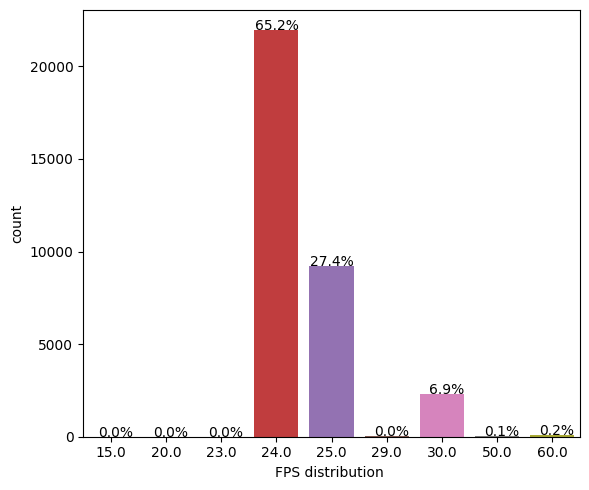

In [98]:

fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['fps'].values)
ax.set(xlabel='FPS distribution ')

#calculating percentage of each label
total = float(len(df['fps']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

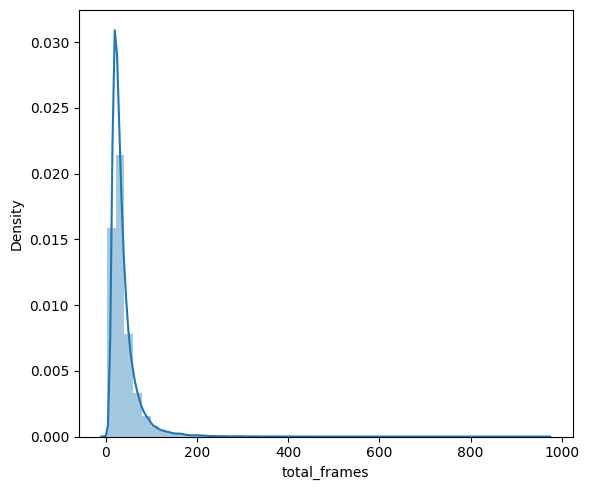

In [105]:

fig, axes = plt.subplots(figsize=(6,5))
sns.distplot(df['total_frames'], kde=True)
fig.tight_layout()

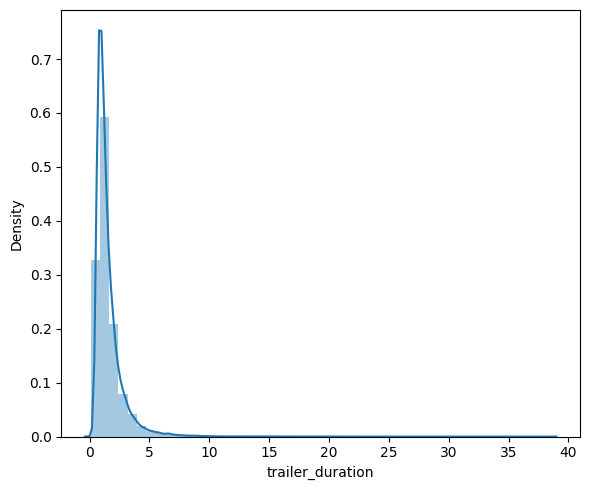

In [109]:
fig, axes = plt.subplots(figsize=(6,5))
sns.distplot(df['trailer_duration'], kde=True)
ax.set(xlabel='Trailer duration (seg)')
fig.tight_layout()